# CHURN PREDICTION IN TELECOM INDUSTRY

Customers are the most important assets of any industry and making the old customers stay and gaining new customers is a crucial role for 
the growth in a market. The customers leaving services of any company are known as churn. These churns depend on many reasons like high customer effort, ineffective marketing, or better offers from competitors.

## Table of contents

### I) Introduction
- Dataset and features
- Problem Statement

### II) EDA (Exploratory Data Analysis)
- Loading the Dataset
- Data Description and Data Cleaning
- Data Transformation
- Correlation Between Features 

### III) Modeling
- Splitting the dataset to training and test data
- Balancing of Training set
- Dimentionality Reduction
- Applying the model

### IV) Evaluation
### IV) Conclusion

# I) INTRODUCTION

## Dataset and feature

The dataset used in this paper is taken from “https://www.kaggle.com/datasets/datazng/telecom-company-churn-rate-call-center-data ”. The dataset consists of 7043 records and 21 features with ‘Churn’ as the target feature.

The features that are in the datasets taken are:

- customerID - A unique id number provided to every customer.

- gender - Male/Female

- SeniorCitizen - Whether the Customer is Senior citzen(1) or not(0).

- Partner - Whether the customer has a partner or not.

- Dependents - Whether the customer has dependents or not.

- tenure - For how much time (in months) the customer is taking the services of the company.

- PhoneService - Whether the customer has a phone service or not.

- MultipleLines - Whether the customer has multiple lines or not or no phone services.

- InternetService - Service provider like DSL, Fiber optic or other.

- OnlineSecurity - Whether the customer has online security or not or no internet service.

- OnlineBackup - Whether the customer has online backup or not or no internet service.

- DeviceProtection - Whether the customer has Device protection or not or no internet service.

- TechSupport - Whether the customer has Technical Support or not or no internet service.

- StreamingTV - Whether the customer has Streaming TV  or not or no internet service.

- StreamingMovies - Whether the customer has Streaming movies on the device or not or no internet service.

- Contract - Type and duration of the contract.
  - Month-to-month
  - One year
  - Two year

- PaperlessBilling - Whether the customer uses paperless Billing or not.

- PaymentMethod - Payment method that customer uses.
    - Mailed check
    - Electronic check
    - Credit card (Automatic)
    - Bank transfer (Automatic)

- MonthlyCharges - Monthly Charges of the customer.

- TotalCharges - Total Charges of the customer.

- Churn (Target Feature) - Whether the customer is churning (leaving) or not. 

## Problem Statement
Why the customers are leaving the services of a particular telecom industry? What are the reason behind them so that the industry can work on those points.

# II) EDA (Exploratory Data Analysis)

### Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as skms
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dt=pd.read_csv(r"D:\projects\Machine Learning\Churn Prediction\Input\telecon churn data.csv")
dt.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Description and Data Cleaning

In [4]:
dt.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
dt.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
dt.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Handling Missing values

In [7]:
dt.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

### Handling Duplicate values

In [8]:
dt.duplicated().any()

False

## Data Transformation
Transforming the data for better analysis.
For example, mapping male as 1 and female as 0 or vice-versa and mapping 1 for the existence of a particular group and 0 for the non-existence of that group

In [9]:
def Data_transform(dataset):
    df = dataset.copy()
    
    df['gender'] = df.gender.map({'Male':1,'Female':0})
    
    df['Partner'] = df.Partner.map({'Yes':1,'No':0})
    
    df['Dependents'] = df.Dependents.map({'Yes':1,'No':0})

    df['PhoneService'] = df.PhoneService.map({'Yes':1,'No':0})
    
    df['MultipleLines'] = df.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})

    df['InternetService'] = df.InternetService.map({'DSL':1,'Fiber optic':1,'No':0})
    
    df['OnlineSecurity'] = df.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
    
    df['OnlineBackup'] = df.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
    
    df['DeviceProtection'] = df.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
    
    df['TechSupport'] = df.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
    
    df['StreamingTV'] = df.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
    
    df['StreamingMovies'] = df.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
    
    df['PaperlessBilling'] = df.PaperlessBilling.map({'Yes':1,'No':0})
    
    df['Churn'] = df.Churn.map({'Yes':1,'No':0})
    
    df['Contract'] = df.Contract.map({'One year':1,'Two year':1,'Month-to-month':0})
    
    df['PaymentMethod'] = df.PaymentMethod.map({'Bank transfer (automatic)':1,'Credit card (automatic)':1,'Electronic check':0,'Mailed check':0})
    
    df.loc[df['TotalCharges']==' ','TotalCharges'] = np.nan
    
    df['TotalCharges'] = df['TotalCharges'].astype('float64')    
    
    df.loc[df['TotalCharges'].isnull()==True,'TotalCharges'] = df['MonthlyCharges'] * df['tenure']

    return df

In [10]:
df=Data_transform(dt)
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,0,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,0,53.85,108.15,1


### Correlation Matrix

In [11]:
def heatmap_graph(corr, chart_title, mask_uppertri=False ):
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 7, 'weight' : 'bold'}
                , cmap=plt.get_cmap("Blues")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()

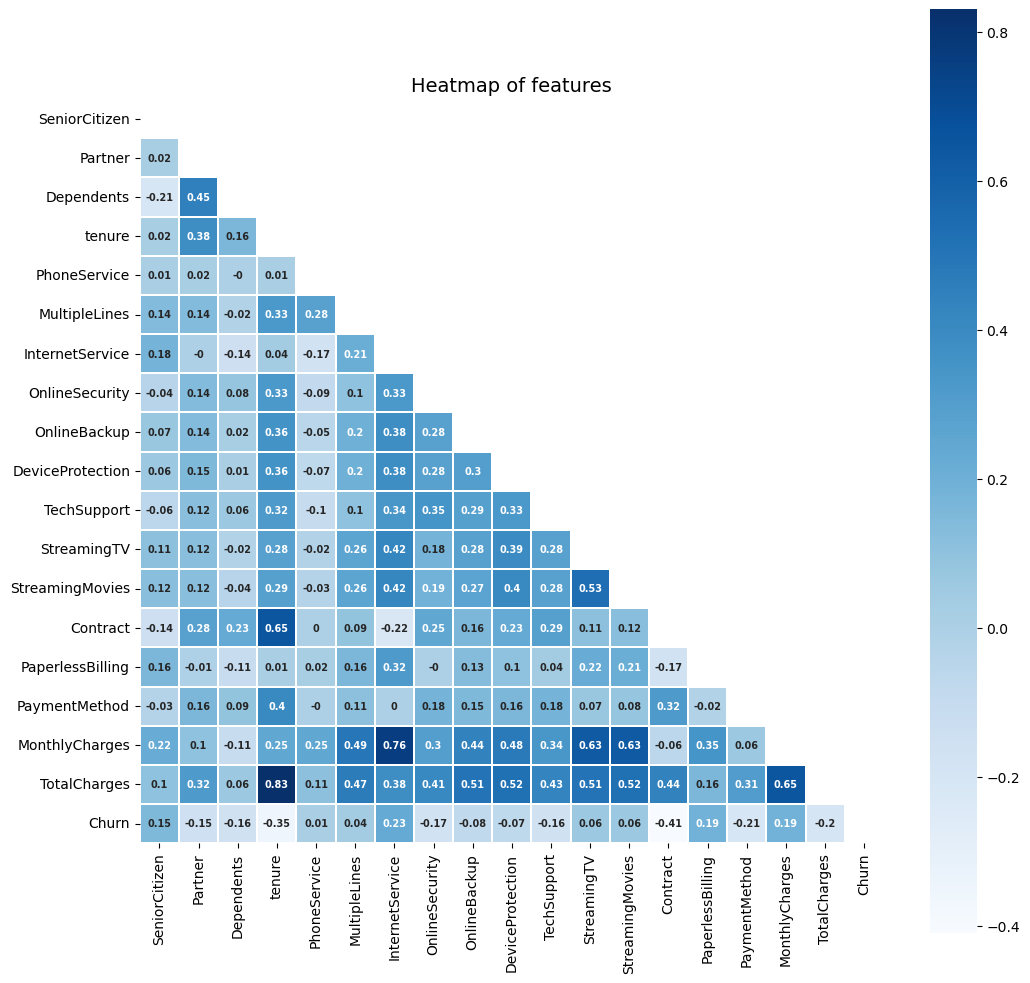

In [12]:
var_corr = round(df.iloc[:, 2:21].corr(),2)
heatmap_graph(var_corr
                       ,chart_title = 'Heatmap of features'
                       ,mask_uppertri = True)

In [13]:
df.drop(columns=["customerID"],inplace=True)

Categorical=[]
Numerical=[]

for i in df.columns:
    if len(df[i].unique())>=5:
        Numerical.append(i)
    else:
        Categorical.append(i)

In [14]:
Categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

### Plotting Distributions of Categorical Features

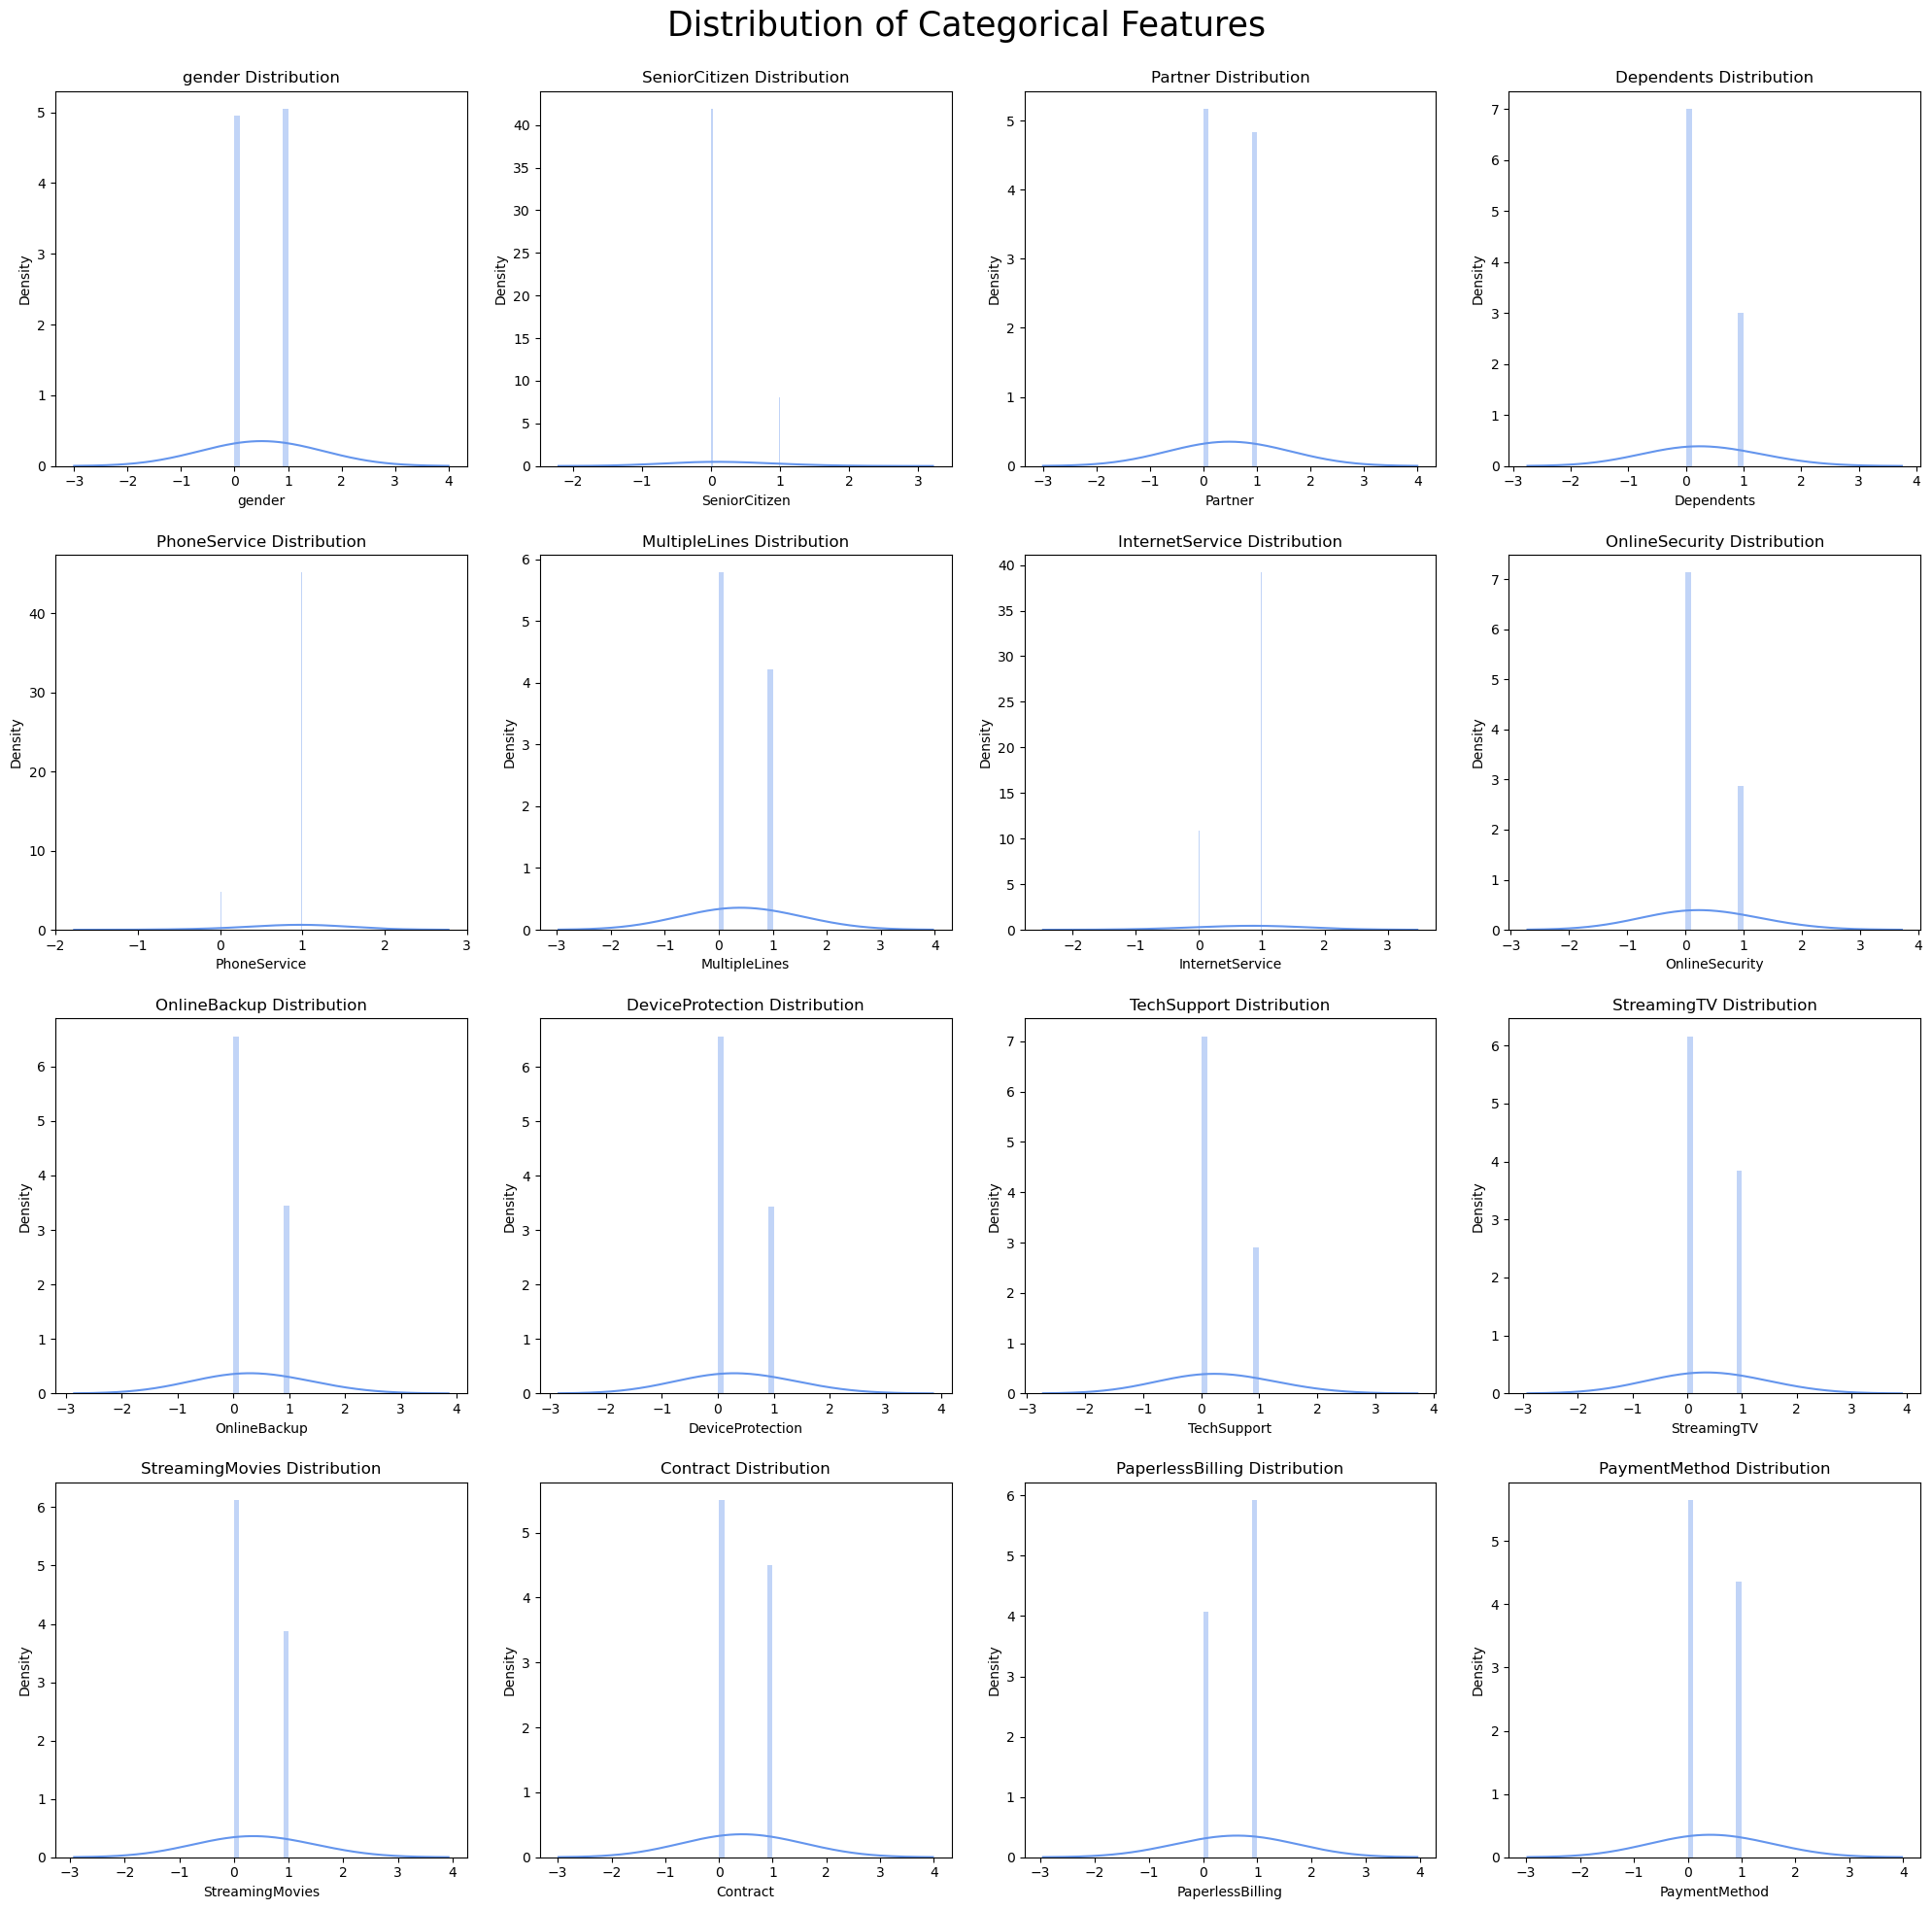

In [15]:
fig=plt.subplots(4,4,figsize=(20,20))

for i in range(len(Categorical)-1):
    plt.subplot(4,4,i+1)
    sns.distplot(df[Categorical[i]],kde_kws = {'bw' : 2},color="cornflowerblue")
    plt.title(Categorical[i]+" Distribution")

plt.suptitle("Distribution of Categorical Features\n",fontsize=25,va="top")    
plt.tight_layout(h_pad=2,w_pad=2)
plt.show()

From the Distribution curves of all the Categorical features, we can say that all Categorical features are normally distributed.

### Plotting Distibution of Numerical Features

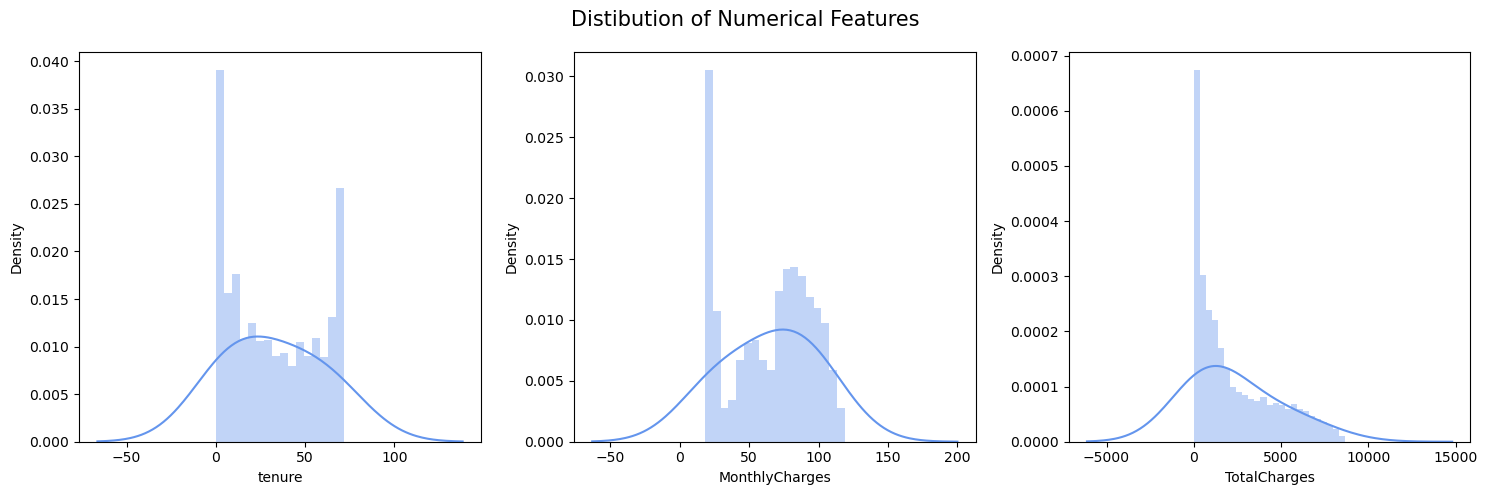

In [16]:
fig=plt.subplots(1,3,figsize=(15,5))

for i in range(len(Numerical)):
    plt.subplot(1,3,i+1)
    sns.distplot(df[Numerical[i]],kde_kws = {'bw' : 0.9},color="cornflowerblue")

plt.suptitle("Distibution of Numerical Features", fontsize=15)
plt.tight_layout()
plt.show()

From the above graphs, we can say that tenure and TotalCharges data Distribution graphs have a longer tail on the right side of the peak whereas MonthlyCharges Distribution graph has a longer tail on the left side of the peak .Hence,
- tenure and TotalCharges - **Rightly or Positively skewed data distribution**
- MonthlyCharges - **leftly or Negatively skewed data distribution**


### Visualizing Target Feature (Churn)

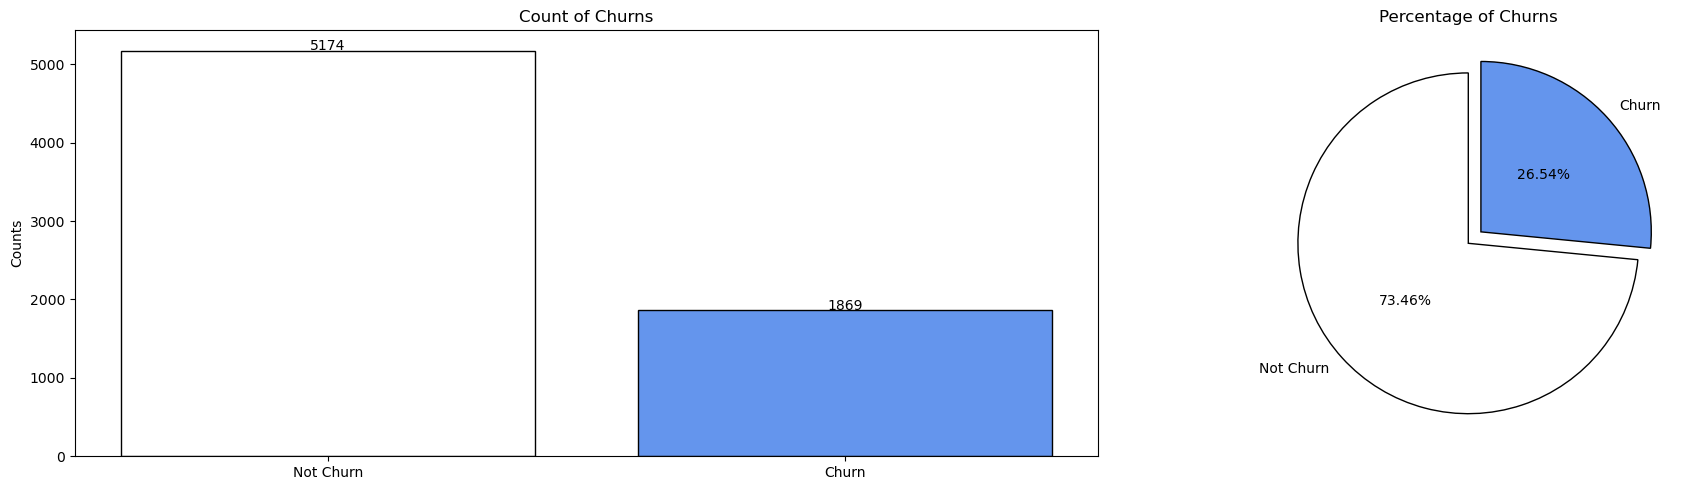

In [17]:
fig=plt.subplots(1,2,figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(["Not Churn","Churn"],df["Churn"].value_counts(),color=["white","cornflowerblue"],edgecolor="black")
for i in range(2):
        plt.text(i,df["Churn"].value_counts()[i]+3, df["Churn"].value_counts()[i], ha = 'center')
plt.title("Count of Churns")
plt.ylabel("Counts")

plt.subplot(1,2,2)
plt.pie(df["Churn"].value_counts(),labels=['Not Churn',"Churn"],startangle=90,autopct="%.2f%%",pctdistance=0.5,explode=[0,0.1],colors=["white","cornflowerblue"], wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title("Percentage of Churns")

plt.tight_layout()
plt.show()

We can see that both categories are uneaqual and are almost in the ratio of 3:1 where Non Churning Cases are almost as thrice as Churning Cases.
- Non Churns : Churns = 3 : 1
- Dataset is unbalanced.

Since, the dataset is unbalanced the prediction will biased towards the category with data having highr count. In this case, it Non Churns.

### Categorical Features vs Target Feature

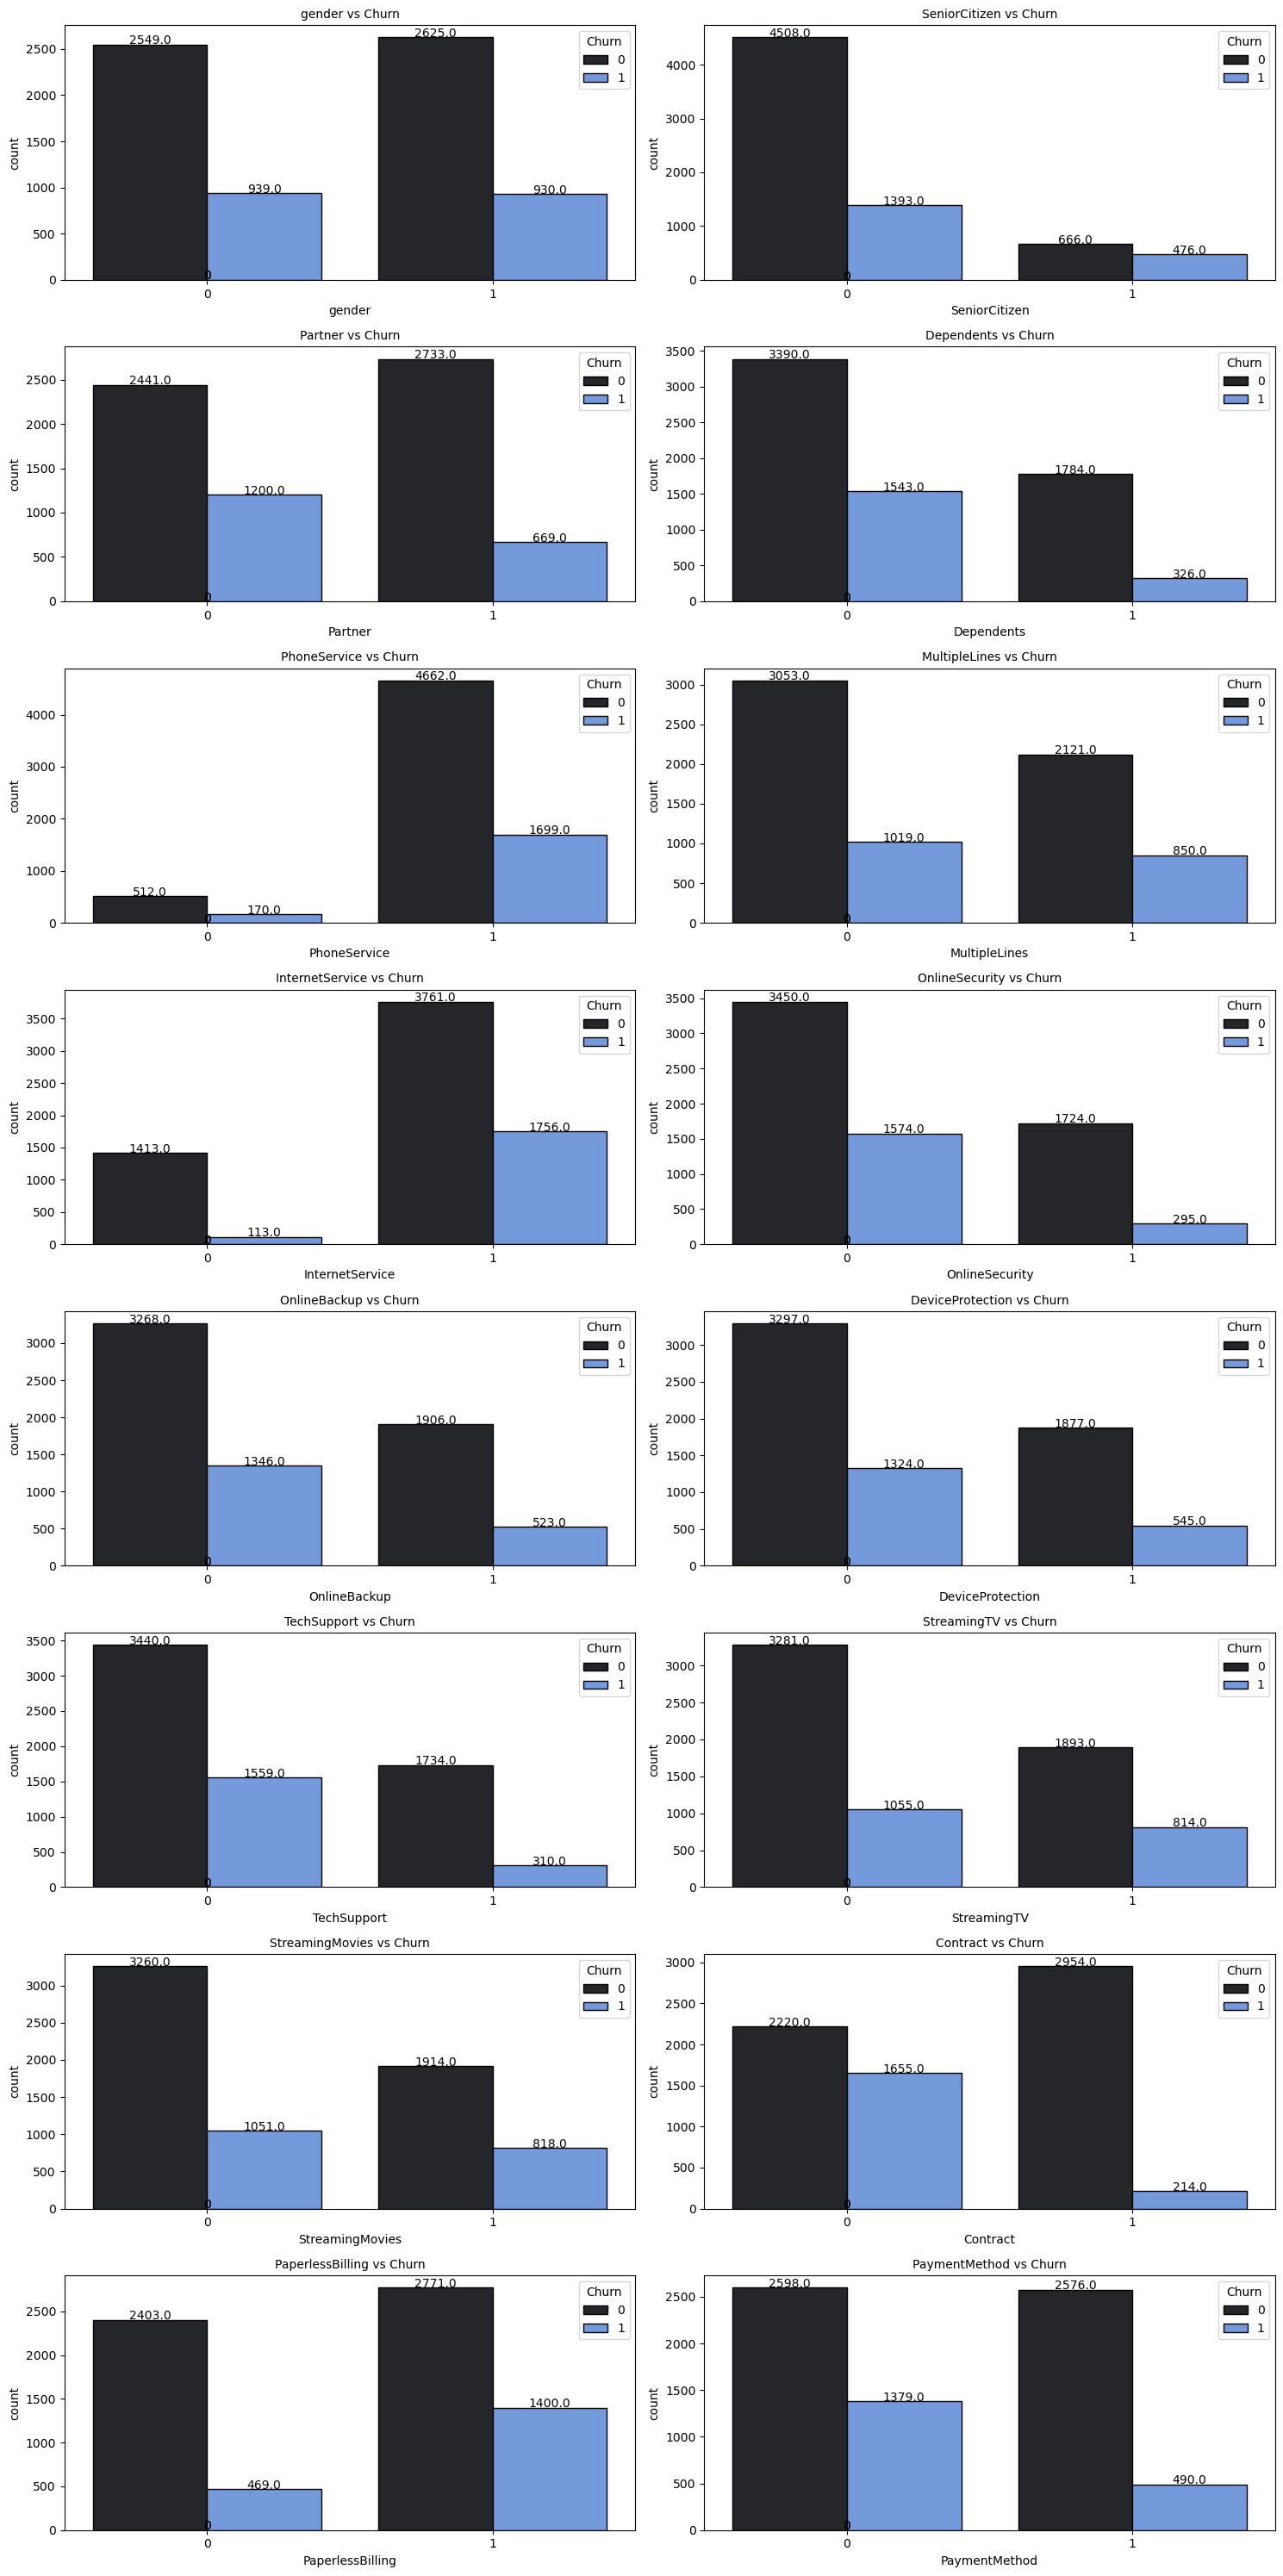

In [18]:
fig=plt.subplots(8,2,figsize=(15,30))

for i in range(len(Categorical)-1):
    plt.subplot(8,2,i+1)
    ax=sns.countplot(x=Categorical[i],data=df,hue="Churn",color="cornflowerblue",edgecolor="black")
    for r in ax.patches:
        ax.text(r.get_x()+r.get_width()/2,r.get_height()+4,r.get_height(),horizontalalignment="center")
    plt.title(Categorical[i]+" vs Churn",fontsize=10)

plt.tight_layout()
plt.show()

- From the above graphs we can see that gender and having multiple lines or not does not effect much whether the customer will churn or not.
- There are more Churns within Customers when they have the PhoneService, InternetService and PaperlessBilling.
- Not being a Senior Citizen also leads to Churn means Senior Citizen tends to rely on a particular company's services not becoming the churns.
- Customer not having a partner, dependent, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract and Automatic Payment method have more probability of becoming churn then having these features.

### Plotting Numerical Features vs Target Feature

In [19]:
df_scaled=df.copy()
df_scaled["tenure"]=[int(i/5) for i in df["tenure"]]
df_scaled["MonthlyCharges"]=[int(i/5) for i in df["MonthlyCharges"]]
df_scaled["TotalCharges"]=[int(i/500) for i in df["TotalCharges"]]

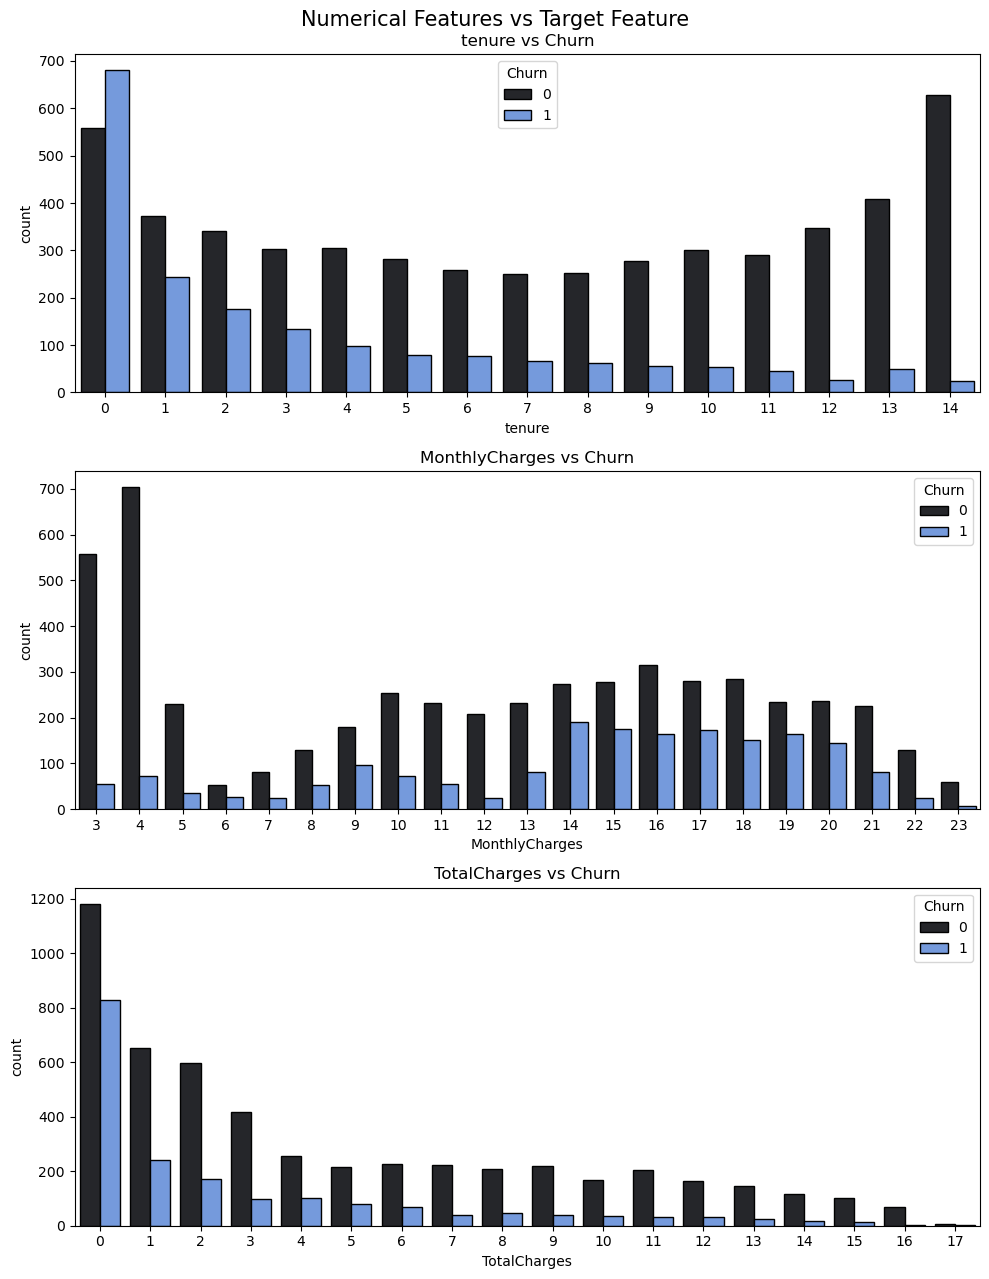

In [20]:
fig=plt.subplots(3,1,figsize=(10,13))
for i in range(len(Numerical)):
    plt.subplot(3,1,i+1)
    sns.countplot(x=Numerical[i],data=df_scaled,hue="Churn",edgecolor="black",color="cornflowerblue")
    plt.title(Numerical[i]+" vs Churn")

plt.suptitle("Numerical Features vs Target Feature",fontsize=15)
plt.tight_layout()
plt.show()

- Customers having low tenore and Total Charges tends to churn and as tenure increases churn rate also decreases.
- Customers churns are associated with Monthly Charges in between 3x5-21x5 i.e., 15-105.

### Kernel Density Plot of Numerical features with respect to target value

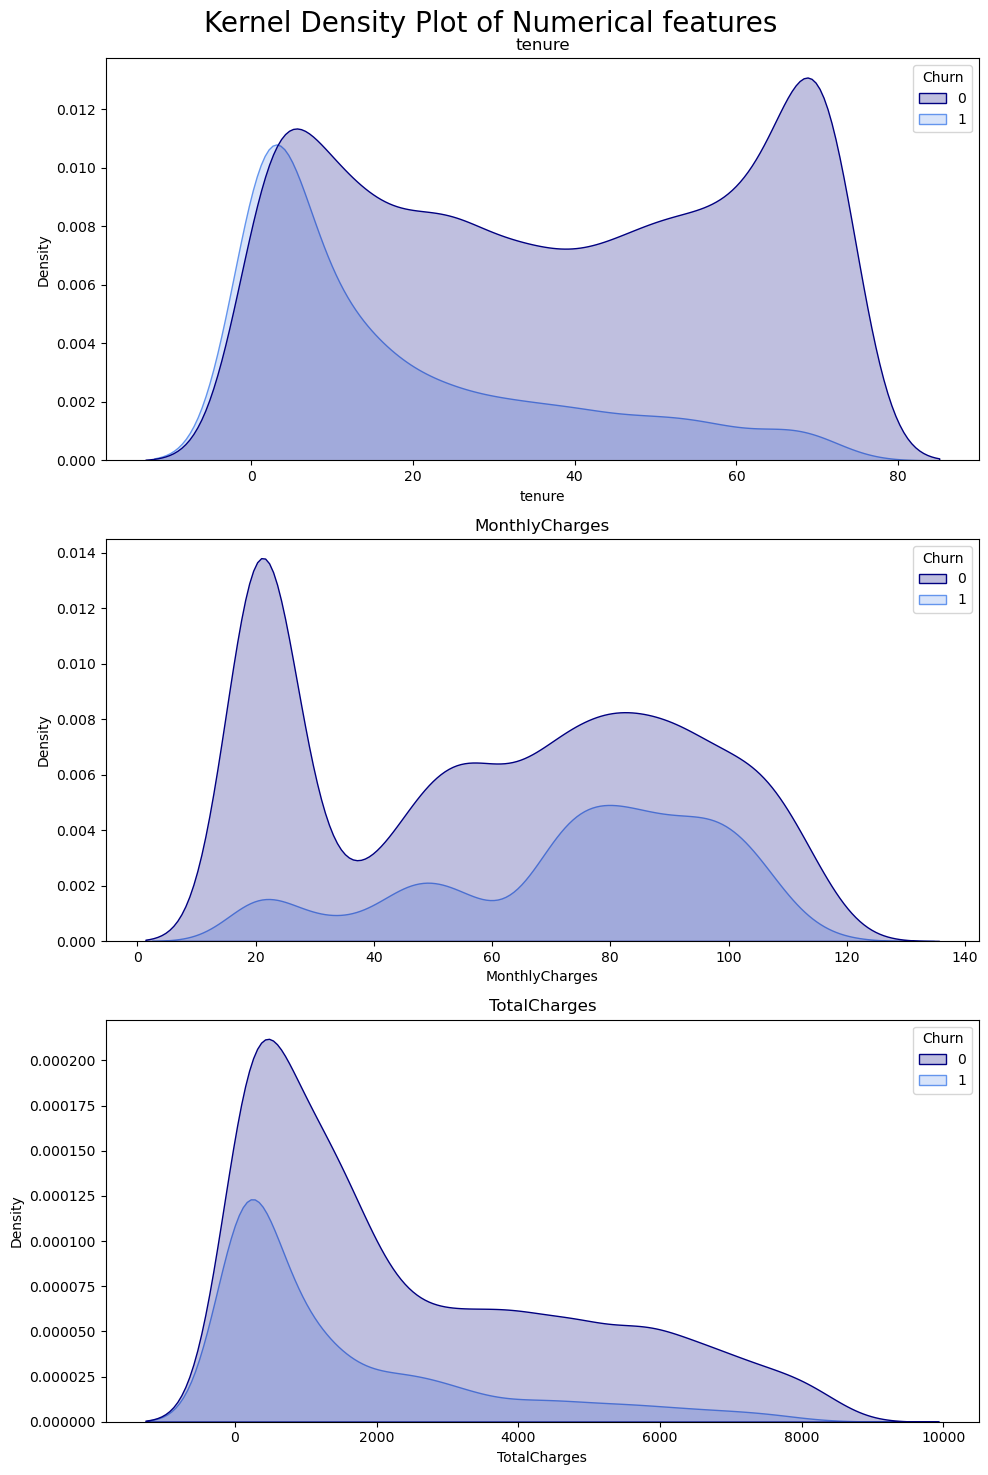

In [21]:
fig=plt.subplots(3,1,figsize=(10,15))
for i in range(len(Numerical)):
    plt.subplot(3,1,i+1)
    sns.kdeplot(x=Numerical[i],data=df,hue="Churn",shade=True,palette = ["Navy","cornflowerblue"])
    plt.title(Numerical[i])
    
    plt.suptitle("Kernel Density Plot of Numerical features ",fontsize=20)

plt.tight_layout()
plt.show()

From above distribution, 
- Customers are more likely to leave company who's tenure is less than 1 or 1.5 year
- Customers are more likely to have more than $65 monthly charges

#### Numerical features vs Numerical features with respect to Target feature

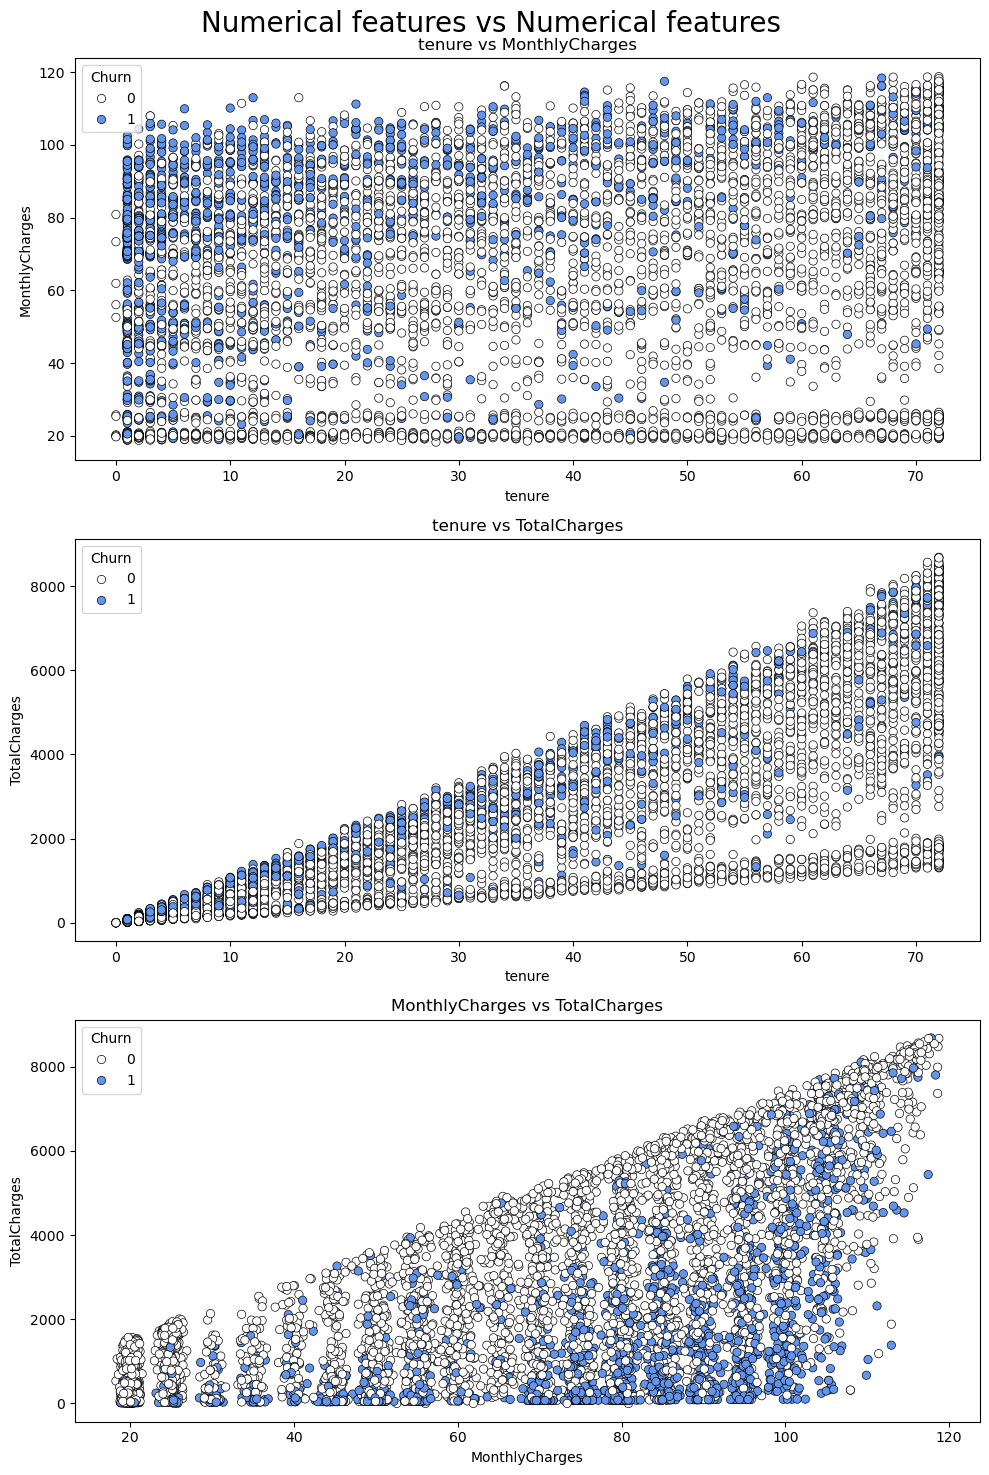

In [22]:
fig=plt.subplots(3,1,figsize=(10,15))
a=0
for j in range(len(Numerical)):
    for i in range(len(Numerical)):
        if j<i and i!=j:
            plt.subplot(3,1,a+1)
            sns.scatterplot(x=Numerical[j],y=Numerical[i],data=df,hue="Churn",palette = ["white","cornflowerblue"],edgecolor = 'black')
            plt.title(Numerical[j]+" vs "+Numerical[i])
            a+=1

    plt.suptitle("Numerical features vs Numerical features ",fontsize=20)

plt.tight_layout()
plt.show()

From the above scatter plots-
- Customers tends to become churn when there is high monthly Charge, above 65 within 1-1.5 years of tenure.
- Customers are probable to become churn when monthly charge is above 65 and Total Charge below 2000.

# II) FEATURE ENGINEERING

### Splitting the dataset to training and test data

In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
X = df.iloc[:, 1:19].values
y = df['Churn']

In [25]:
X_train,X_test,y_train,y_test=skms.train_test_split(X,y,test_size=0.30,random_state=24)

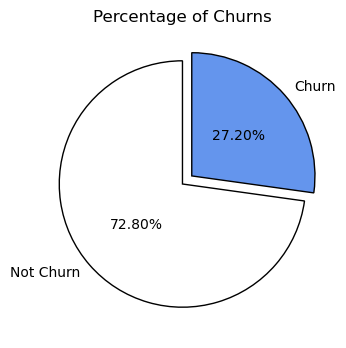

In [26]:
plt.figure(figsize=(4,4))
plt.pie(y_train.value_counts(),labels=['Not Churn',"Churn"],startangle=90,autopct="%.2f%%",pctdistance=0.5,explode=[0,0.1],colors=["white","cornflowerblue"], wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title("Percentage of Churns")
plt.show()

Here, we can see that both the classes are unequal by a huge ratio, hence, balancing of the training dataset is required.

### Balancing the Train dataset

In [27]:
st=SMOTE()
X_train,y_train = st.fit_resample(X_train, y_train)

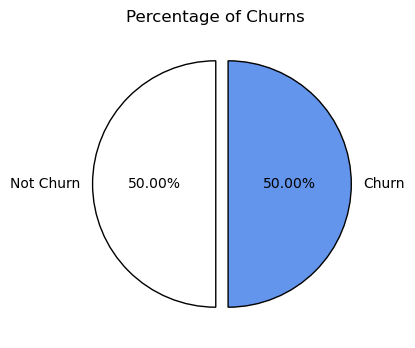

In [28]:
plt.figure(figsize=(4,4))
plt.pie(y_train.value_counts(),labels=['Not Churn',"Churn"],startangle=90,autopct="%.2f%%",pctdistance=0.5,explode=[0,0.1],colors=["white","cornflowerblue"], wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title("Percentage of Churns")
plt.show()

From the above pie chart, we can see that training data set has been balanced.

### Scaling the Data

In [29]:
def Scaling(X_train,X_test):
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train,X_test

In [30]:
X_train,X_test=Scaling(X_train,X_test)

### Dimensionality Reduction

In [31]:
def dim_reduction(X_train,X_test):
    pca = PCA(0.90)
    X_train= pca.fit_transform(X_train)
    X_test= pca.transform(X_test)
    
    return X_train,X_test 

In [32]:
X_train,X_test=dim_reduction(X_train,X_test)

# III) MODELLING

In this analysis, we will employ various classification algorithms, including K-Nearest Neighbors (KNN), Random Forest, XGBoost, and Multi-layered Perceptron. We will evaluate these models based on accuracy and F1-score. Since our dataset is unbalanced, we will prioritize the F1-score. The F1-score is a better metric for unbalanced datasets because it considers both precision and recall, providing a more comprehensive evaluation of model performance in this context compared to accuracy, which does not account for class distribution.

In [33]:
accuracy=[]
F1_score=[]
Model=[]

### 1) K Nearest Neighbors

In [34]:
Model.append("KNN")

In [35]:
knn=KNeighborsClassifier()
para_knn={"n_neighbors":[i for i in range(5,30)],
          "p":[1,2,3]}

In [36]:
grid_knn = GridSearchCV(knn, para_knn, cv=10, scoring='f1', return_train_score=False,verbose=0)
gridsearch_knn=grid_knn.fit(X_train, y_train)

In [37]:
BestModel_knn=gridsearch_knn.best_estimator_
BestModel_knn.fit(X_train,y_train)
pred=BestModel_knn.predict(X_test)

In [38]:
accuracy_knn= accuracy_score(y_test, pred)
F1_score_knn=f1_score(y_test, pred)

In [39]:
accuracy.append(accuracy_knn)
F1_score.append(F1_score_knn)

In [40]:
print(f"accuracy of knn: {accuracy_knn * 100:.2f}%")
print(f"F1_score of knn: {F1_score_knn * 100:.2f}%")

accuracy of knn: 72.27%
F1_score of knn: 56.07%


### 2) Random Forest

In [41]:
Model.append("Random Forest")

In [42]:
rf=RandomForestClassifier()
para_rf={'n_estimators': [100,200,400,600,800,1000],
         'max_features': ['auto', 'sqrt', 'log2'],
         'max_depth' : [4,5,6,7,8],
         'criterion' :['gini', 'entropy']}

In [43]:
grid_rf = GridSearchCV(rf, para_rf, cv=10, scoring='f1', return_train_score=False,verbose=0)
gridsearch_rf=grid_rf.fit(X_train, y_train)

In [44]:
BestModel_rf=gridsearch_rf.best_estimator_
BestModel_rf.fit(X_train,y_train)
pred=BestModel_rf.predict(X_test)

In [45]:
accuracy_rf= accuracy_score(y_test, pred)
F1_score_rf=f1_score(y_test, pred)

In [46]:
accuracy.append(accuracy_rf)
F1_score.append(F1_score_rf)

In [47]:
print(f"accuracy of RF: {accuracy_rf * 100:.2f}%")
print(f"F1_score of RF: {F1_score_rf * 100:.2f}%")

accuracy of RF: 74.92%
F1_score of RF: 60.09%


### 3) XGBoost

In [48]:
Model.append("XGBoost")

In [49]:
xgb=XGBClassifier()
para_xgb = {'max_depth': range (2,16,1),
            'n_estimators': [100,200,400,600,800,1000],
            'learning_rate': [0.1,0.01,0.05]}

In [50]:
grid_xgb = GridSearchCV(xgb, para_xgb, cv=10, scoring='f1', return_train_score=False,verbose=0)
gridsearch_xgb=grid_xgb.fit(X_train, y_train)

In [51]:
BestModel_xgb=gridsearch_xgb.best_estimator_
BestModel_xgb.fit(X_train,y_train)
pred=BestModel_xgb.predict(X_test)

In [52]:
accuracy_xgb= accuracy_score(y_test, pred)
F1_score_xgb=f1_score(y_test, pred)

In [53]:
accuracy.append(accuracy_xgb)
F1_score.append(F1_score_xgb)

In [54]:
print(f"accuracy of XGBoost: {accuracy_xgb * 100:.2f}%")
print(f"F1_score of XGBoost: {F1_score_xgb * 100:.2f}%")

accuracy of XGBoost: 75.34%
F1_score of XGBoost: 52.59%


### 4) Multi-layered perceptron

In [55]:
Model.append("MLP")

In [56]:
mlp=MLPClassifier()
para_mlp={'hidden_layer_sizes':[(10,),(15,),(20,),(50,),(100,0)],
          'activation':['logistic', 'tanh', 'relu'],
          'solver':['adam','rmsprop'],
          'learning_rate': ['constant', 'invscaling', 'adaptive'],
          'alpha': [0.0001,0.001,0.01],}

In [57]:
grid_mlp = GridSearchCV(mlp, para_mlp, cv=10, scoring='f1', return_train_score=False,verbose=0)
gridsearch_mlp=grid_mlp.fit(X_train, y_train)

In [58]:
BestModel_mlp=gridsearch_mlp.best_estimator_
BestModel_mlp.fit(X_train,y_train)
pred=BestModel_mlp.predict(X_test)

In [59]:
accuracy_mlp= accuracy_score(y_test, pred)
F1_score_mlp=f1_score(y_test, pred)

In [60]:
accuracy.append(accuracy_mlp)
F1_score.append(F1_score_mlp)

In [61]:
print(f"accuracy of MLP: {accuracy_mlp * 100:.2f}%")
print(f"F1_score of MLP: {F1_score_mlp * 100:.2f}%")

accuracy of MLP: 77.57%
F1_score of MLP: 59.56%


# III) Evaluation

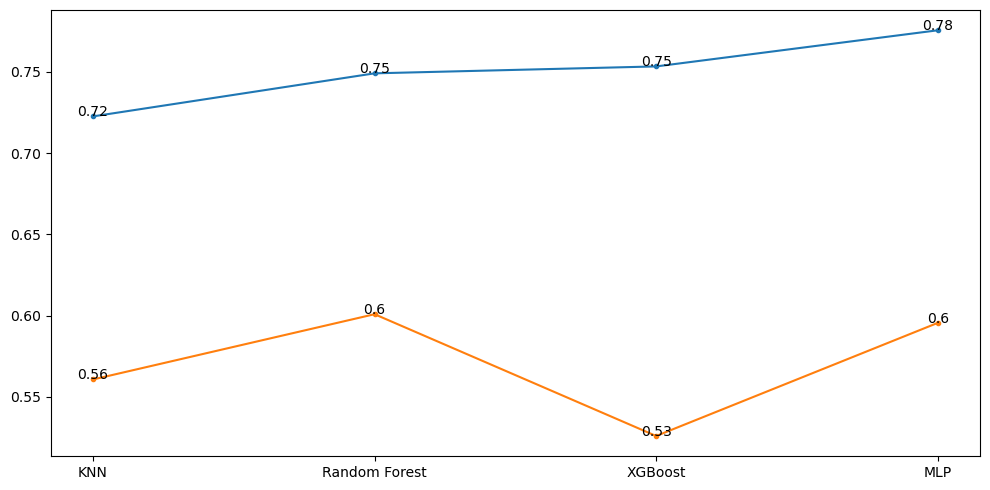

In [62]:
plt.figure(figsize=(10,5))

plt.plot(Model,accuracy,marker='.')
plt.plot(Model,F1_score,marker='.')

for i in range(len(Model)):
    plt.text(i,accuracy[i],round(accuracy[i],2),ha = 'center')
        
for i in range(len(Model)):
    plt.text(i,F1_score[i],round(F1_score[i],2),ha = 'center')

plt.tight_layout()
plt.show()

We compared the performance of four classification algorithms: K-Nearest Neighbors (KNN), Random Forest, XGBoost, and Multi-layered Perceptron (MLP).

**Model Evaluation Scores**

| Model          | Accuracy (%) | F1 Score (%) |
|----------------|--------------|--------------|
| KNN            | 72.27        | 56.07        |
| Random Forest  | 74.92        | 60.09        |
| XGBoost        | 75.34        | 52.59        |
| MLP            | 77.57        | 59.56        |

# IV) Conclusion

In conclusion, the evaluation of various classification algorithms on our imbalanced dataset revealed that the Multi-layered Perceptron (MLP) model performed the best, achieving the highest accuracy and F1-score. This indicates that MLP is the most effective model for this classification task, effectively handling the challenges posed by the imbalanced data. Random Forest also showed strong performance, making it a viable alternative. The F1-scores highlighted the importance of considering both precision and recall in evaluating model performance for imbalanced datasets.